# Opinion Mining using Yelp Reviews

##### Authors: Aldo Marini, Daniel Fernandez, Shounak Purkayastha

###### Abstract:
An important part of an opinion is its sentiment. To predict these sentiments, we use a Yelp dataset to train an Opinion Mining model. We explore two approaches for creating features: uni-gram bag of words model and pre-trained embeddings. The bag of words model is based on the count of lemmatized words in each opinion. The pre-trained embeddings are built using the GloVe model over 2B tweets. Both models extract semantic information from the database. Stars are assigned by users to business reviews. We first partition these stars into positive and negative sentiment. We then focus on predicting the sentiment of a review based on a balanced set in terms of users, businesses, positive and negative reviews.

## DESCRIPTIVE STATISTICS

In [1]:
import pandas as pd
basic = pd.read_csv('basic_db.gz')

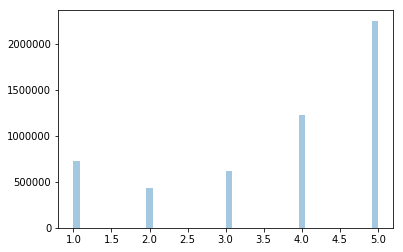

In [5]:
import seaborn as sns
sns.distplot(basic['stars'].values, kde=False)


## Statistics of reviews per Users

In [8]:
grps_person = basic.groupby('user_id')
reviews_person = grps_person.count().sort_values(by='business_id', ascending = False)  ## Counts of reviews per person
pd.options.display.float_format = '{:20,.2f}'.format
reviews_person.iloc[:,1].describe()

count           1,326,101.00
mean                    3.97
std                    13.71
min                     1.00
25%                     1.00
50%                     1.00
75%                     3.00
max                 3,569.00
Name: date, dtype: float64

### Statistics of reviews per Business

In [9]:
grps_business = basic.groupby('business_id')
reviews_business = grps_business.count().sort_values(by='stars', ascending = False)  ## Counts of reviews per business
pd.options.display.float_format = '{:20,.2f}'.format
reviews_business.iloc[:,1].describe()

count             174,567.00
mean                   30.14
std                    98.22
min                     1.00
25%                     4.00
50%                     8.00
75%                    23.00
max                 7,362.00
Name: stars, dtype: float64

In [11]:
reviews_person.iloc[:,1].to_csv('reviews_per_user_tableau.csv')

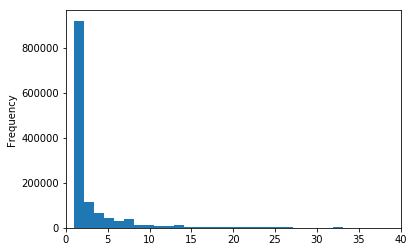

In [12]:
import matplotlib as plt

#Making an histogram to see how are the counts of reviews by user are distributed
reviews_person.iloc[:,1].plot.hist(bins = 3000, xlim=(0,40))

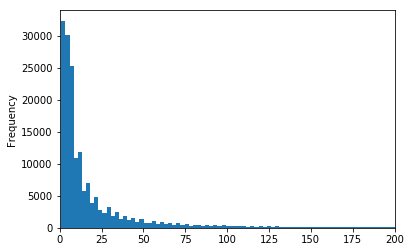

In [6]:
import matplotlib as plt

#Making an histogram to see how are the counts of reviews by business are distributed
reviews_business.iloc[:,1].plot.hist(bins = 3000, xlim=(0,200))

In [6]:
def percentiles(type1, type2, base, output):
    import numpy as np
    import matplotlib as plt
    import time

    start_time = time.time()
    basic = base
    # This for loop calculates the percentiles and of the counts of reviews per . 
    #Also calculates the sum of number of reviews accumulates in actual and previous percentiles
    # Group by user id
    grps_ = basic.groupby(type1)
    ## Counts of reviews per person
    reviews_ = grps_.count().sort_values(by=type2, ascending = False)
    
    #Calculates the Percentiles
    list_quantiles_ = []
    list_sum_reviews_ = []
    for i in np.arange(1,101,1):
        list_quantiles_.append(reviews_.iloc[:,1].quantile(i/100))   ## Calculates percentiles over the count of reviews
        list_sum_reviews_.append(sum(reviews_.iloc[:,1].sort_values()[0:int(len(reviews_.iloc[:,1])*i/100)]))   #Accumulative sum of count of reviews by percentile
    
    # Creating and printing the table of percentiles
    q = np.arange(1,101,1)
    percentiles_count = pd.DataFrame({'Count_Reviews':list_quantiles_, 'Percentile':q, 'Sum_reviews':list_sum_reviews_})
    print(percentiles_count.head(output))
    
    #Plot of Percentiles vs Sum of Reviews
    title = 'Percentiles and Sum of reviews by '+ type1
    percentiles_count.plot(x='Percentile',y='Sum_reviews', title=title)
    print(time.time() - start_time)
    return percentiles_count

    Count_Reviews  Percentile  Sum_reviews
0             1.0           1        13261
1             1.0           2        26522
2             1.0           3        39783
3             1.0           4        53044
4             1.0           5        66305
5             1.0           6        79566
6             1.0           7        92827
7             1.0           8       106088
8             1.0           9       119349
9             1.0          10       132610
10            1.0          11       145871
11            1.0          12       159132
12            1.0          13       172393
13            1.0          14       185654
14            1.0          15       198915
15            1.0          16       212176
16            1.0          17       225437
17            1.0          18       238698
18            1.0          19       251959
19            1.0          20       265220
20            1.0          21       278481
21            1.0          22       291742
22         

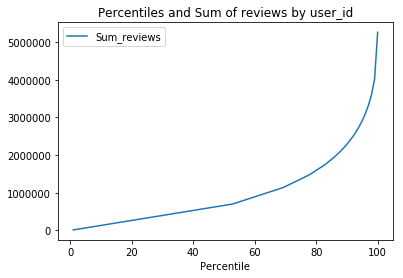

In [15]:
percentiles_user = percentiles('user_id','business_id', basic, 100)
percentiles_user.to_csv('percetiles_counts_tableau.csv')

### Similarly for business

    Count_Reviews  Percentile  Sum_reviews
0             3.0           1         5191
1             3.0           2        10429
2             3.0           3        15667
3             3.0           4        20902
4             3.0           5        26140
5             3.0           6        31378
6             3.0           7        36613
7             3.0           8        41851
8             3.0           9        47089
9             3.0          10        52324
10            3.0          11        57562
11            3.0          12        62800
12            3.0          13        68035
13            3.0          14        73273
14            3.0          15        78511
15            3.0          16        83746
16            3.0          17        88984
17            3.0          18        94222
18            4.0          19       100240
19            4.0          20       107224
20            4.0          21       114208
21            4.0          22       121188
22         

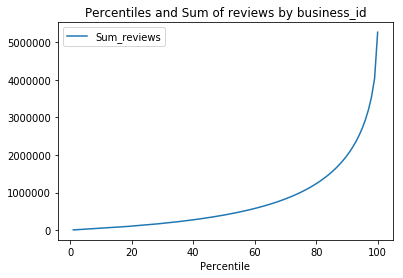

In [16]:
percentiles_business = percentiles('business_id', 'user_id', basic, 100)
percentiles_business.to_csv('percetiles_counts_business_tableau.csv')

## Limiting the reviews per user
Getting the user id of those people

In [140]:
import pandas as pd
basic = pd.read_csv('basic_db.gz')

Given the noise that this unbalanced data (in terms of review counts by users) can have, and in line with Bo Pang and Lillian Lee and Shivakumar Vaithyanathan (2002) we decide to keep at most 41 reviews per user (which is the 99th percentile).

In [141]:
#Remove the reviews with 3 stars
basic = basic[basic['stars'] != 3]
# Group by user id
grps_person = basic.groupby('user_id')
## Counts of reviews per person
reviews_person = grps_person.count().sort_values(by='business_id', ascending = False)
#Setting the output format
pd.options.display.float_format = '{:20,.2f}'.format
#Display
reviews_person.iloc[:,1][0:10]

user_id
CxDOIDnH8gp9KXzpBHJYXw    1645
DK57YibC5ShBmqQl97CKog    1129
bLbSNkLggFnqwNNzzq-Ijw    1098
PKEzKWv_FktMm2mGPjwd0Q    1010
cMEtAiW60I5wE_vLfTxoJQ    1009
QJI9OSEn6ujRCtrX06vs1w     921
U4INQZOPSUaj8hMjLlZ3KA     848
ELcQDlf69kb-ihJfxZyL0A     813
hWDybu_KvYLSdEFzGrniTw     805
dIIKEfOgo0KqUfGQvGikPg     795
Name: date, dtype: int64

In [142]:
#Filter users with more than 41 reviews
import os
users_large_num_reviews = pd.Series(reviews_person[reviews_person['stars']>41].index)
users_large_num_reviews.to_csv('./users_large_num_reviews.csv')


## Limiting the reviews per business

In [144]:
#Remove the reviews with 3 stars
basic = basic[basic['stars'] != 3]
# Group by user id
grps_business = basic.groupby('business_id')
## Counts of reviews per business
reviews_business = grps_business.count().sort_values(by='stars', ascending = False)
#Setting the output format
pd.options.display.float_format = '{:20,.2f}'.format
#Display
reviews_business.iloc[:,1][0:10]

business_id
4JNXUYY8wbaaDmk3BPzlWw    6508
RESDUcs7fIiihp38-d6_6g    5907
K7lWdNUhCbcnEvI0NhGewg    4799
cYwJA2A6I12KNkm2rtXd5g    4573
DkYS3arLOhA8si5uUEmHOw    4310
f4x1YBxkLrZg652xt2KR5g    4084
KskYqH1Bi7Z_61pH6Om8pg    3538
5LNZ67Yw9RD6nf4_UhXOjw    3428
SMPbvZLSMMb7KU76YNYMGg    3261
iCQpiavjjPzJ5_3gPD5Ebg    3243
Name: stars, dtype: int64

In [145]:
import os
business_large_num_reviews = pd.Series(reviews_business[reviews_business['stars']>101].index)
business_large_num_reviews.to_csv('./business_large_num_reviews.csv')

## Reading the data of Reviews (text) to make a JOIN

In [147]:
import pandas as pd
data = pd.read_csv('review_db.gz')
data.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,business_id,stars,text,user_id
0,0W4lkclzZThpx3V65bVgig,5,"Love the staff, love the meat, love the place....",bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...,bv2nCi5Qv5vroFiqKGopiw
3,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...,bv2nCi5Qv5vroFiqKGopiw
4,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...,bv2nCi5Qv5vroFiqKGopiw


We are not using datapoints with 3 stars, because we take them as neutral. We get rid of them to decrease data size.

In [149]:
data = data.drop(data[data['stars']=='QRn8ELZmvP8S4evnSRU9bQ'].index)
data = data.drop(data[data['stars']=='aZs_IrhA7rvuLBumVhJjCw'].index)
data['stars'][data['stars']=='1'] = 1
data['stars'][data['stars']=='2'] = 2
data['stars'][data['stars']=='3'] = 3
data['stars'][data['stars']=='4'] = 4
data['stars'][data['stars']=='5'] = 5
data = data[data['stars'] != 3]
print(set(data['stars']))
data = data.filter(items=['business_id','stars','text','user_id'])

{1, 2, 4, 5}


### We take the users and Business that are above each threshold and join them to the review(comments) data set in order to get the rows that those reviews are.

In [143]:
import pandas as pd
users_to_random = pd.read_csv('users_large_num_reviews.csv', header = None)[1]
print(len(users_to_random))
users_to_random.head(5)

10085


0    CxDOIDnH8gp9KXzpBHJYXw
1    DK57YibC5ShBmqQl97CKog
2    bLbSNkLggFnqwNNzzq-Ijw
3    PKEzKWv_FktMm2mGPjwd0Q
4    cMEtAiW60I5wE_vLfTxoJQ
Name: 1, dtype: object

In [146]:
import pandas as pd
business_to_random = pd.read_csv('business_large_num_reviews.csv', header = None)[1]
print(len(business_to_random))
business_to_random.head(5)

8709


0    4JNXUYY8wbaaDmk3BPzlWw
1    RESDUcs7fIiihp38-d6_6g
2    K7lWdNUhCbcnEvI0NhGewg
3    cYwJA2A6I12KNkm2rtXd5g
4    DkYS3arLOhA8si5uUEmHOw
Name: 1, dtype: object

In [150]:
users_to_random.name='user_id'
users_to_random = users_to_random.to_frame()

business_to_random.name = 'business_id'
business_to_random = business_to_random.to_frame()

## Merges the users to random reviews with all the data to get the indexes

In [151]:
data['index'] = data.index
data.head()

,business_id,stars,text,user_id,index
0,0W4lkclzZThpx3V65bVgig,5,"Love the staff, love the meat, love the place....",bv2nCi5Qv5vroFiqKGopiw,0
1,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...,bv2nCi5Qv5vroFiqKGopiw,1
2,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...,bv2nCi5Qv5vroFiqKGopiw,2
3,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...,bv2nCi5Qv5vroFiqKGopiw,3
4,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...,bv2nCi5Qv5vroFiqKGopiw,4


In [152]:
import time
start_time = time.time()
datos_user_lage_review = data.merge(users_to_random, how='inner', on='user_id')#,right_index=True)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.1600189208984375 seconds ---


In [155]:
import time
start_time = time.time()
datos_business_lage_review = data.merge(business_to_random, how='inner', on='business_id')#, right_index=True)
print("--- %s seconds ---" % (time.time() - start_time))

--- 10.152512073516846 seconds ---


### This append the rows from prolific reviewers and prolific business

In [159]:
all_large = datos_business_lage_review.append(datos_user_lage_review)

all_large_to_drop = all_large.drop_duplicates()

# Dropping data from prolific reviewers and Business

In [172]:
import time
start_time = time.time()
data=data.drop(all_large_to_drop['index'], axis = 0)
#data=data.drop(datos_business_lage_review.index)
print("--- %s seconds ---" % (time.time() - start_time))

--- 13.956459045410156 seconds ---


In [176]:
data=data.filter(items=['business_id','stars','text','user_id'])
data.head()

,business_id,stars,text,user_id
1,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...,bv2nCi5Qv5vroFiqKGopiw
3,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...,bv2nCi5Qv5vroFiqKGopiw
4,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...,bv2nCi5Qv5vroFiqKGopiw
6,8QWPlVQ6D-OExqXoaD2Z1g,5,Cycle Pub Las Vegas was a blast! Got a groupon...,_4iMDXbXZ1p1ONG297YEAQ


In [178]:
data.to_csv('./Full_data_before_random.csv')

# Random Sample of 10,000 rows (2,500 by star)

In [179]:
import pandas as pd
data_before_random = pd.read_csv('Full_data_before_random.csv')

In [180]:
data_before_random.head()

,Unnamed: 0,business_id,stars,text,user_id
0,1,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...,bv2nCi5Qv5vroFiqKGopiw
1,2,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...,bv2nCi5Qv5vroFiqKGopiw
2,3,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...,bv2nCi5Qv5vroFiqKGopiw
3,4,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...,bv2nCi5Qv5vroFiqKGopiw
4,6,8QWPlVQ6D-OExqXoaD2Z1g,5,Cycle Pub Las Vegas was a blast! Got a groupon...,_4iMDXbXZ1p1ONG297YEAQ


In [181]:
data = data_before_random.filter(items=['business_id','stars','user_id','text'])

This takes statistics of the new data

In [183]:
data_one = data[data['stars']==1].sample(n=2500)
data_two = data[data['stars']==2].sample(n=2500)
data_four = data[data['stars']==4].sample(n=2500)
data_five = data[data['stars']==5].sample(n=2500)

new_data = data_one.append(data_two)
new_data = new_data.append(data_four)
new_data = new_data.append(data_five)

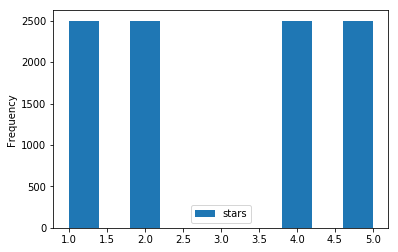

In [186]:
new_data.plot.hist()

In [187]:
new_data.to_csv('./new_data_balanced.csv')

# BASELINE MODEL

The baseline model takes a list of good and bad words and classify the comments based on the numbers of good vs the number of bad words in each comment. For example, if a comment has 20 'good' words and 15 'bad' words, it is classified as a good comment.

For testing accuracy, we are taking bad comments as comments with one and two stars and good comments those with four and five stars.

In [1]:
import pandas as pd
data = pd.read_csv('new_data_balanced.csv')

data = data.filter(['business_id','stars','user_id','text'])
data.head()

## Descriptive Statistics

    Count_Reviews  Percentile  Sum_reviews
0             1.0           1           98
1             1.0           2          197
2             1.0           3          295
3             1.0           4          394
4             1.0           5          492
5             1.0           6          591
6             1.0           7          690
7             1.0           8          788
8             1.0           9          887
9             1.0          10          985
10            1.0          11         1084
11            1.0          12         1182
12            1.0          13         1281
13            1.0          14         1380
14            1.0          15         1478
15            1.0          16         1577
16            1.0          17         1675
17            1.0          18         1774
18            1.0          19         1873
19            1.0          20         1971
20            1.0          21         2070
21            1.0          22         2168
22         

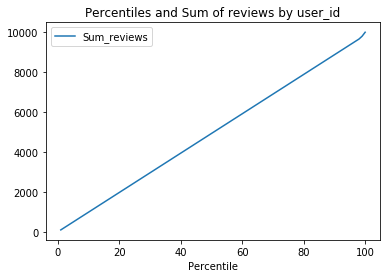

In [8]:
percentiles_user_final = percentiles('user_id','stars', data, 100)
percentiles_user_final.to_csv('percentiles_user_final.csv')

    Count_Reviews  Percentile  Sum_reviews
0             1.0           1           92
1             1.0           2          184
2             1.0           3          277
3             1.0           4          369
4             1.0           5          462
5             1.0           6          554
6             1.0           7          647
7             1.0           8          739
8             1.0           9          832
9             1.0          10          924
10            1.0          11         1016
11            1.0          12         1109
12            1.0          13         1201
13            1.0          14         1294
14            1.0          15         1386
15            1.0          16         1479
16            1.0          17         1571
17            1.0          18         1664
18            1.0          19         1756
19            1.0          20         1849
20            1.0          21         1941
21            1.0          22         2033
22         

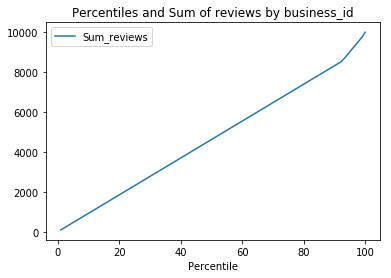

In [10]:
percentiles_business_final = percentiles('business_id','stars', data, 100)
percentiles_business_final.to_csv('percentiles_business_final.csv')

In [40]:
grouped_user_final = data.groupby('user_id')
reviews_user_final = grouped_user_final.count().sort_values(by='stars', ascending = False)  ## Counts of reviews per business
reviews_user_final.iloc[:,1].to_csv('final_reviews_per_user_tableau.csv')

grouped_business_final = data.groupby('business_id')
reviews_business_final = grouped_business_final.count().sort_values(by='stars', ascending = False)  ## Counts of reviews per business
reviews_business_final.iloc[:,1].to_csv('final_reviews_per_business_tableau.csv')


## Modeling

In [3]:
data = data.reset_index()

data = data.filter(items=['stars','text'])

negative = pd.read_csv('./Words_classifier/lexicon/negative-wordscopy.txt', encoding="ISO-8859-1", header = None)
positive = pd.read_csv('./Words_classifier/lexicon/positive-wordscopy.txt', encoding="ISO-8859-1", header = None)

for i in range(len(data)):
    data.iloc[i,1] = data.iloc[i,1].lower()

data['prediction'] = -1
data['net_sum'] = 0

In [13]:
import time
start_time = time.time()
for i in range(len(data)):
    #print(i)
    net_sum_pos_neg = sum(data.iloc[i,1].count(x) for x in positive[0]) - sum(data.iloc[i,1].count(x) for x in negative[0]) 
    data.iloc[i,3] = net_sum_pos_neg
    if net_sum_pos_neg < 0:
        data.iloc[i,2] = 0
    elif net_sum_pos_neg > 0:
        data.iloc[i,2] = 1

print(time.time()-start_time)

644.1976940631866


## Examples of Classification Baseline

In [36]:
a1=data.sort_values(by=['net_sum']).head()
a1

,stars,text,prediction,net_sum,sentiment
2207,1,i don't understand the rave reviews about this...,0,-75,0
1671,1,i am only writing this review because i have g...,0,-70,0
2989,2,allgemein\r\nuna storia italiana noioso\r\nunp...,0,-70,0
2402,1,bottom line if you don't read the rest: the co...,0,-67,0
399,1,please i repeat please do not take your car he...,0,-64,0


In [37]:
a2=data.sort_values(by=['net_sum'], ascending = False).head()
a2

,stars,text,prediction,net_sum,sentiment
5171,4,4.5/5. \r\n\r\ni have been seeing this place o...,1,32,1
7730,5,wow! first-class service!\r\nwhen my daughter'...,1,31,1
8704,5,what an amazing place!!! i will start off by ...,1,28,1
5884,4,"fantastic, lively atmosphere with excellent fo...",1,27,1
6198,4,i decided to try the bikram yoga studio in pho...,1,27,1


In [38]:
a3=data.loc[data['net_sum'] == 0,:].head(2)
a3

,stars,text,prediction,net_sum,sentiment
18,1,i had a change in my insurance at the beginnin...,-1,0,0
40,1,we put in a prescription for our two-month-old...,-1,0,0


In [39]:
a4=data.loc[data['net_sum'] == 0,:].tail(2)
a4

,stars,text,prediction,net_sum,sentiment
9973,5,i had a very negative experience with an unrep...,-1,0,1
9991,5,fashion starts here. highly underrated boutiqu...,-1,0,1


In [46]:
baseline = a2.append(a3)
baseline = baseline.append(a4)
baseline = baseline.append(a1)
baseline.to_csv('examples_baseline_tableau.csv')
baseline

,stars,text,prediction,net_sum,sentiment
5171,4,4.5/5. \r\n\r\ni have been seeing this place o...,1,32,1
7730,5,wow! first-class service!\r\nwhen my daughter'...,1,31,1
8704,5,what an amazing place!!! i will start off by ...,1,28,1
5884,4,"fantastic, lively atmosphere with excellent fo...",1,27,1
6198,4,i decided to try the bikram yoga studio in pho...,1,27,1
18,1,i had a change in my insurance at the beginnin...,-1,0,0
40,1,we put in a prescription for our two-month-old...,-1,0,0
9973,5,i had a very negative experience with an unrep...,-1,0,1
9991,5,fashion starts here. highly underrated boutiqu...,-1,0,1
2207,1,i don't understand the rave reviews about this...,0,-75,0


In [78]:
#c = data.sort_values(by=['net_sum'])
e1 = data.loc[((data['sentiment'] == 1) & (data['net_sum'] < -22)),:]
e1

,stars,text,prediction,net_sum,sentiment
5133,4,the supper club experience at buonanotte is a ...,0,-30,1
6724,4,wir sind ein kleinunternehmen und besuchten au...,0,-23,1
7295,4,where do i start. i say the deals on facebook ...,0,-26,1
7494,4,unsere letzte bewertung für die taverna yol vo...,0,-50,1


In [79]:
e2 = data.loc[((data['sentiment'] == 0) & (data['net_sum'] > 14)),:]
e2

,stars,text,prediction,net_sum,sentiment
4267,2,in theory it's a good idea. a cheerful little ...,1,20,0
4582,2,"i love cupcrazed! their amazing, in fort mill....",1,18,0


In [81]:
# Misclassification Examples
e1.append(e2).to_csv('examples_misclassification_baseline_tableu.csv')

data['sentiment'] = 0

for i in range(len(data)):
    if data.iloc[i,0] == 1 or data.iloc[i,0] == 2:
        data.iloc[i,4] = 0
    else:
        data.iloc[i,4] = 1

Neutral comments

In [15]:
data_not_classified = data[data['prediction']==-1]
len(data_not_classified)

704

In [16]:
data_not_classified['sentiment'].describe()

count    704.000000
mean       0.475852
std        0.499772
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: sentiment, dtype: float64

Accuracy over all the sample

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(data['sentiment'], data['prediction'])

0.7271

Accuracy over only non-neutral

In [18]:
data_classified = data[data['prediction']!=-1]

from sklearn.metrics import accuracy_score
accuracy_score(data_classified['sentiment'], data_classified['prediction'])

two_and_four = []
for i in range(len(data)):
    if data.iloc[i,0] == 2 or data.iloc[i,0] == 4:
        two_and_four.append(data.iloc[i,:])


Accuracy of data with only reviews of two stars and four stars:

In [21]:
accuracy_score(pd.DataFrame(two_and_four)['sentiment'], pd.DataFrame(two_and_four)['prediction'])

0.6712

Accuracy of data with only reviews of one stars and five stars:

In [22]:
data_one_five = data.drop(pd.DataFrame(two_and_four).index)

Taking non classified as negative comments:

In [ ]:
data.loc[data['prediction']==-1,'prediction']=0

accuracy_score(data['sentiment'], data['prediction'])

from sklearn.metrics import confusion_matrix

confusion_matrix(data['sentiment'], data['prediction'])


In [26]:
data.to_csv('/Users/jd/OneDrive/Carnegie Mellon/Materias/Machine Learning/Project/Base_classification.csv')

## Data Cleaning
We first import the data, and clean it by removing stopwords and tokenizing.

In [ ]:
%matplotlib inline
import spacy
import pandas as pd
import numpy as np
import re
import string

In [20]:
# load data
reviews = pd.read_csv('./parsed/new_data_balanced.csv')

idx1 = [True if i == 1 else False for i in reviews['stars']]
idx5 = [True if i == 5 else False for i in reviews['stars']]
y = reviews['stars'].tolist()
y = [-1 if star in [1,2] else 1 for star in y]
reviews = pd.Series(reviews['text'])
reviews = reviews.tolist()

In [2]:
# load spacy en
nlp = spacy.load('en_core_web_sm')

# load stopwords
# inspired by https://stackoverflow.com/a/3510894
stopwords = pd.read_csv("./nlp/stopwords.txt", header = None, encoding = "UTF-8", squeeze=True)
stopwords = np.asarray(stopwords)
pattern = "|".join(stopwords)
stopwords = re.compile("\\b(" + pattern + ")\\W", re.I)
punctuation = re.compile(r'[^\w_ ]+', re.I)

# clean the text (drops punctuation, only alpha-numeric, no stopwords)
x = []
i = 0
for review in reviews:
    review = punctuation.sub("", review)
    review = stopwords.sub("", review)
    parsed_text = nlp(review)
    intermediate_text = []
    for token in parsed_text:
        intermediate_text.append(token.lemma_.lower())
    words = " ".join(intermediate_text)
    if words != '':
        x.append(words)
    i+=1
    
i=0
for review in x[:5]:
    print(i)
    print(review)
    i+=1
    
# clear memory
reviews = None

0
disappointment cronut year expensive worst tasting cronut suppose light fluffy hard cardboard save money selection weak overprice apple fritter look like turd maple bar taste like plastic quest rid valley pathetic excuse donut shop
1
complain food review necessary compare place chipotle comparewhen size menu big want burrito small try big hungry huge pretty big maybe little big chipotle huge differencelike say compare chipotle love homemade process flavourfirst sautéed pepper onion bean fake come box like bean fake spread buy grocery store unique   rice cook alright topping usual topping fancy guacamole free scared chipotle charge extra make sure   overall taste burrito bland lack flavour season   call salt pepper exist cilantro topping really caned salsa bean paste   taste tortilla be not great allnot mention burrito wait extra 6 minute heat grill mark flat   want sour cream guac heating pay roughly 11 chicken burrito tax huge pick chipotle day week 1250 guacps make good burrito hom

In [ ]:
import pickle
with open('./parsed/spacy_lemmas.pkl', 'wb') as f:
   pickle.dump(x, f)

In [5]:
with open('./parsed/spacy_lemmas.pkl', 'rb') as f:
   x = pickle.load(f)

## Creating features
We then turn the Yelp reviews into vectors with the help of word embeddings. These embeddings are pre-trained tensors of the GloVe model on Twitter. So, we load these embeddings and create an average of the word tensors by review. This is, given a review, we take the average of the individual token embeddings and asign it to the review. Hence, each Yelp review now is has a feature vector built on the embeddings.

We use GloVe pretrained embeddings on Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors) to use for sentiment analysis. We obtained the embeddings from https://nlp.stanford.edu/projects/glove/.

Representation learning for very short texts using weighted word embedding aggregation. Cedric De Boom, Steven Van Canneyt, Thomas Demeester, Bart Dhoedt. Pattern Recognition Letters; arxiv:1607.00570. abstract, pdf. See especially Tables 1 and 2. https://arxiv.org/pdf/1607.00570

###  25, 50, 100, 150, 200 dimensional embeddings

In [6]:
med_matrix = {}
for e in [25, 50, 100, 200]:
    # load GloVe
    # Pre-process the embeddings
    embeddings_index = {}

    # We will use the 50-dimensional embedding vectors
    with open("./nlp/glove.twitter.27B."+str(e)+"d.txt", encoding='UTF-8') as f:
        # Each row represents a word vector
        for line in f:
            values = line.split()
            # The first part is word
            word = values[0]
            # The rest are the embedding vector
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    print('Found {} word vectors for embedding of size {}'.format(len(embeddings_index), e))

    # create embedding feature matrix by attaching average embedding to each review

#     fmatrix = np.zeros((len(x), e*3))
    m = np.zeros((len(x), e))
    j = 0
    for review in x:
        words = review.split()
        unique_words = np.unique(words)
        embedding_matrix = np.zeros((len(words), e))
        i = 0
        for word in words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
                i+=1
        # compute the median
#         fmatrix[j] = np.append(embedding_matrix.max(0), [embedding_matrix.min(0), np.median(embedding_matrix, axis=0)])
        m[j] = np.median(embedding_matrix, axis=0)
        j += 1
    med_matrix[e] = m


Found 1193514 word vectors for embedding of size 25
Found 1193514 word vectors for embedding of size 50
Found 1193514 word vectors for embedding of size 100
Found 1193514 word vectors for embedding of size 200


### Bag of Words

Next, we build the feautures for the Bag of Words approach, using spaCy's lemmatization.

In [16]:
# Create document term matrix
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(
                                max_df=0.9,
                                min_df=100,
                                stop_words='english')
tf_master = tf_vectorizer.fit_transform(x)
print("The vocabulary size is: {}.".format(tf_master.shape[1]))
vocab_list = list(tf_vectorizer.vocabulary_.keys())

The vocabulary size is: 684.


#### Some intuition on why use pre-trained embeddings: a semantically meaningful mapping to an n-dimensional space

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

exindex = [7730,8704,5884,6198,18,40,9973,9991,2207,1671,2402,399]
example = med_matrix[200][exindex,:]
yexample = list(np.array(y)[exindex])

invindex = list(set(range(len(med_matrix[200]))) - set(exindex))

knn = KNeighborsClassifier(5, metric='cosine', n_jobs=-1)
knn.fit(med_matrix[200][invindex], list(np.array(y)[invindex]))
prob = knn.predict_proba(example)
pred = knn.predict(example)
accuracy_score(yexample, pred)

0.8333333333333334

In [127]:
from sklearn.metrics.pairwise import cosine_similarity

no_comments = 5
similarComments = []
for i in exindex:
    k = cosine_similarity(med_matrix[200], med_matrix[200][i,:].reshape(1,200)).flatten()
    index = np.argsort(k)
    similarComments.append(list(np.array(reviews)[index[-no_comments-1:]]))

df = pd.DataFrame(similarComments)
df.rename({no_comments:'original'}, inplace=True, axis='columns')
df['probability'] = prob[:,1]
df['prediction'] = pred
df['observed'] = yexample

df.to_csv('similarComments.csv')
df

,0,1,2,3,4,original,probability,prediction,observed
0,I decided to move here after leaving my husban...,Seems that Living Social has quite a few coupo...,If I could give this place a NEGATIVE set of s...,I recently moved from Chicago area to Phoenix....,I really wanted this cleaning service to be th...,Wow! First-Class Service!\r\nWhen my daughter'...,0.2,-1,1
1,We visited OTORO yesterday 7/23/17 and had an ...,I have been to Veer Preet 10+ times. No more. ...,I was introduced to Harness by Yelp back in Fe...,"I hurt. That's good. Yesterday, I did a reform...","Having done MA for most of my life, I am very ...",What an amazing place!!! I will start off by ...,0.8,1,1
2,We were here in Rocky River from Los Angeles f...,Visiting Sushi Too was truly refreshing. As a ...,This is a nice pub to visit in Newmarket. They...,Some of these reviews were written super early...,I normally don't call servers out by name in Y...,"Fantastic, lively atmosphere with excellent fo...",1.0,1,1
3,I was introduced to Harness by Yelp back in Fe...,"Having done MA for most of my life, I am very ...","I hurt. That's good. Yesterday, I did a reform...",Seems that Living Social has quite a few coupo...,I'm disappointed. \r\n\r\nI've practiced Bikra...,I decided to try the Bikram Yoga Studio in Pho...,0.6,1,1
4,Scottsdale office on Desert Cove. I had a ref...,First of all they have one of the nicest facil...,"Love this place! Wait time is about 5 minutes,...",Dr. Shelly Friedman is a kindly doctor whose b...,"While the dentist may be good, the front offic...",I had a change in my insurance at the beginnin...,0.2,-1,-1
5,This place has been quite terrible to me. Not ...,My friend and I went over to get our nails don...,This place takes the cake for filthiest and wo...,I have type 2 diabetes and no thyroid. I have...,My daughter had a severe headache since eight ...,We put in a prescription for our two-month-old...,0.0,-1,-1
6,I am coming here for few years and what struck...,We purchased our retail business 4-1/2 years a...,Getting divorced is emotionally overwhelming.....,After doing extensive research on the internet...,I moved about 3.5 hours away with this company...,I had a very negative experience with an unrep...,0.4,-1,1
7,As an active woman in the world of motorsports...,After seeing so many positive reviews for this...,Finally a place that listens to thier clients....,"Sadly, after five consecutive years of attendi...",It's been over three months since I started wi...,Fashion starts here. Highly underrated boutiqu...,0.8,1,1
8,Hmmm....what did I really expect for 13 bucks?...,I really want to like this place but it just d...,Bought a Groupon for Salon Diva for my fiancé ...,Seems that Living Social has quite a few coupo...,So I am on the hunt for a new nail place in Wh...,I don't understand the rave reviews about this...,0.2,-1,-1
9,Updated 11-22-2016\r\nThe whole property is un...,For all Yelpers looking to rent in the Squirre...,This place has pretty much the worst managemen...,I am torn about my review because while it's c...,I have lived in this complex for just over a y...,I am only writing this review because I have g...,0.0,-1,-1


## Model Selection
We now train several models using the review embeddings as feature matrix. We run a grid search over the models to select the best model, and the best parametrization for every model.

#### Train and Cross-Validate with Pre-Trained Word Embeddings

In [24]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



optimal = {}
for e in [25, 50, 100, 200]:
    # split data into testing and training
    xtrain, xtest, ytrain, ytest = train_test_split(med_matrix[e], y, test_size=0.25, random_state=11)

    models = [
             "Gaussian N. Bayes",
             "SVM",
             "Logistic Regression",
             "Decision Tree",
             "Random Forest",
             "Boosted Stumps",
             "KNN"
            ]

    classifiers = [
        GaussianNB(),
        LinearSVC(),
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        KNeighborsClassifier(),
    ]

    parameters = [
                  {},                                                         # Gaussian Naive Bayes
                  {'C': np.logspace(-4, 3, 5)},                               # SVM
                  {'C': np.logspace(-4, 3, 10)},                              # Logistic Regression
                  {'max_depth': np.linspace(10,200, 20)},                     # Decision Trees
                  {'n_estimators': np.linspace(100, 1000, 3).astype('int')},  # Random Forest
                  {'n_estimators': np.linspace(100, 1500, 3).astype('int'),   # Adaboost Forest
                   'learning_rate': np.linspace(0.001, 2, 3)},
                  {'n_neighbors': np.linspace(2, 50, 5).astype('int')},       # KNN
                 ]
    
    for model, clf, params in zip(models, classifiers, parameters):
        gscv = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1, verbose=1)
        gscv = gscv.fit(xtrain, ytrain)
        score = gscv.best_score_
        optimal[model+str(e)] = {'name':model, 'clf':gscv.best_estimator_, 'score':score, 'embed':e}
        print("{} score: {}".format(model, score))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


Gaussian N. Bayes score: 0.7077333333333333
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.5s finished


SVM score: 0.7862666666666667
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


Logistic Regression score: 0.7874666666666666
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished


Decision Tree score: 0.7076
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   37.7s finished


Random Forest score: 0.7897333333333333
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.7min finished


Boosted Stumps score: 0.7882666666666667
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   14.2s finished


KNN score: 0.7561333333333333
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


Gaussian N. Bayes score: 0.7162666666666667
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.2s finished


SVM score: 0.81
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.1s finished


Logistic Regression score: 0.8121333333333334
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.4s finished


Decision Tree score: 0.7074666666666667
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   49.4s finished


Random Forest score: 0.8090666666666667
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.1min finished


Boosted Stumps score: 0.7992
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   32.0s finished


KNN score: 0.7618666666666667
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


Gaussian N. Bayes score: 0.7082666666666667
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.9s finished


SVM score: 0.8393333333333334
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished


Logistic Regression score: 0.8390666666666666
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.6s finished


Decision Tree score: 0.7004
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished


Random Forest score: 0.8178666666666666
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  5.8min finished


Boosted Stumps score: 0.8185333333333333
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.2min finished


KNN score: 0.7598666666666667
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


Gaussian N. Bayes score: 0.7022666666666667
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   13.1s finished


SVM score: 0.8501333333333333
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.9s finished


Logistic Regression score: 0.8508
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.5s finished


Decision Tree score: 0.716
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.5min finished


Random Forest score: 0.8277333333333333
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 11.5min finished


Boosted Stumps score: 0.8369333333333333
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.2min finished


KNN score: 0.7410666666666667


Enable model persistence.

In [25]:
import pickle
with open('./models/median_embeddings.pkl', 'wb') as f:
   pickle.dump(optimal, f)

### Train and CV with BoW

In [28]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



optimalBow = {}
# split data into testing and training
xtrainBow, xtestBow, ytrainBow, ytestBow = train_test_split(tf_master.toarray(), y, test_size=0.25, random_state=11)

models = [
         "Gaussian N. Bayes",
         "SVM",
         "Logistic Regression",
         "Decision Tree",
         "Random Forest",
         "Boosted Stumps",
         "KNN"
        ]

classifiers = [
    GaussianNB(),
    LinearSVC(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
]

parameters = [
              {},                                                         # Gaussian Naive Bayes
              {'C': np.logspace(-4, 3, 5)},                               # SVM
              {'C': np.logspace(-4, 3, 10)},                              # Logistic Regression
              {'max_depth': np.linspace(10,200, 20)},                     # Decision Trees
              {'n_estimators': np.linspace(100, 1000, 3).astype('int')},  # Random Forest
              {'n_estimators': np.linspace(100, 1500, 3).astype('int'),   # Adaboost Forest
               'learning_rate': np.linspace(0.001, 2, 3)},
              {'n_neighbors': np.linspace(2, 50, 5).astype('int')},       # KNN
             ]

for model, clf, params in zip(models, classifiers, parameters):
    gscv = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1, verbose=1)
    gscv = gscv.fit(xtrainBow, ytrainBow)
    score = gscv.best_score_
    optimalBow[model] = {'name':model, 'clf':gscv.best_estimator_, 'score':score, 'embed':e}
    print("{} score: {}".format(model, score))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished


Gaussian N. Bayes score: 0.7538666666666667
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.4s finished


SVM score: 0.8693333333333333
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.9s finished


Logistic Regression score: 0.8710666666666667
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.3s finished


Decision Tree score: 0.7541333333333333
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.3min finished


Random Forest score: 0.8568
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 12.2min finished


Boosted Stumps score: 0.8572
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.0min finished


KNN score: 0.7145333333333334


Enable model persistence.

In [29]:
import pickle
with open('./models/bow.pkl', 'wb') as f:
   pickle.dump(optimalBow, f)

## Calculate test error
We now test the best model, as obtained by the last procedure. This model is the best among the selected model families and also has the best hyper-parameter selection.

### PTE

In [109]:
# get the PTE best model
bestModel = max(map(lambda x: (optimal[x]['score'], x), optimal.keys()))[1]
bestClf = optimal[bestModel]['clf']
print(bestClf)
print('The best number of embeddings is: {}'.format(optimal[bestModel]['embed']))

LogisticRegression(C=0.774263682681127, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
The best number of embeddings is: 200


In [110]:
# calculate the predictions
predtest = bestClf.predict(xtest)

# report training and test accuracy
print('Test accuracy is: ' + str(accuracy_score(ytest, predtest)))

Test accuracy is: 0.8432


In [111]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, predtest)

array([[1056,  173],
       [ 219, 1052]], dtype=int64)

### BoW

In [112]:
# get the PTE best model
bestModel = max(map(lambda x: (optimalBow[x]['score'], x), optimalBow.keys()))[1]
bestClfBow = optimalBow[bestModel]['clf']
print(bestClfBow)

LogisticRegression(C=0.1291549665014884, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [113]:
# calculate the predictions
predtestBow = bestClfBow.predict(xtestBow)

# report training and test accuracy
print('Test accuracy is: ' + str(accuracy_score(ytestBow, predtestBow)))

Test accuracy is: 0.8712


In [114]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytestBow, predtestBow)

array([[1065,  164],
       [ 158, 1113]], dtype=int64)

### ROC Curves

In [91]:
predtest

array([[0.30320519, 0.69679481],
       [0.04519256, 0.95480744],
       [0.03642784, 0.96357216],
       ...,
       [0.37180773, 0.62819227],
       [0.22437566, 0.77562434],
       [0.64978063, 0.35021937]])

<Figure size 432x288 with 0 Axes>

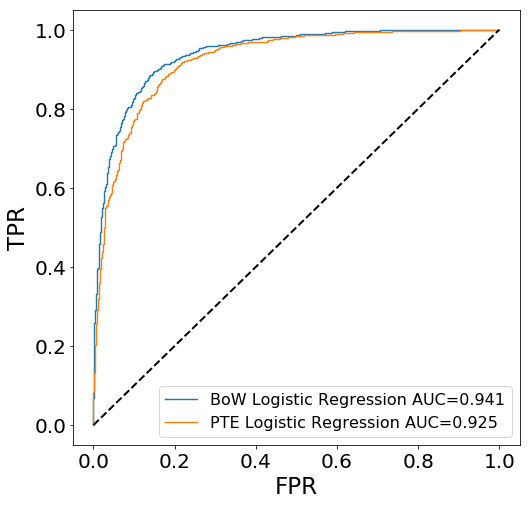

In [107]:
from sklearn.metrics import roc_curve

plt.figure()
predtest = bestClf.predict_proba(xtest)[:,1]
predtestBow = bestClfBow.predict_proba(xtestBow)[:,1]

fpr, tpr, _ = roc_curve(ytest, predtest, pos_label=1)
fprBow, tprBow, _ = roc_curve(ytestBow, predtestBow, pos_label=1)
aucBow = np.trapz(tprBow, fprBow)
auc = np.trapz(tpr, fpr)
fig = plt.figure(figsize=(8,8))
plt.plot(fprBow, tprBow, label="BoW Logistic Regression AUC=" + "{:.3f}".format(aucBow), lw=1.4)
plt.plot(fpr, tpr, label="PTE Logistic Regression AUC=" + "{:.3f}".format(auc), lw=1.4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel("FPR", size=23)
plt.ylabel("TPR", size=23)
plt.legend(fontsize=16)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.savefig('ROC.png', dpi=1000, pad_inches=0)
plt.show()

#### Record the data to tables:

##### CV Error

In [119]:
cvTable = pd.DataFrame(np.zeros((7, 6)))
cvTable.rename({0:'Model Family', 1:'25-d', 2:'50-d', 3:'100-d', 4:'200-d', 5:'BoW'}, axis=1, inplace=True)

for i, model in enumerate(models):
    cvTable.loc[i, 'Model Family'] = model
    for e in [25, 50, 100, 200]:
        cvTable.loc[i, str(e)+'-d'] = optimal[model+str(e)]['score']
    cvTable.loc[i, 'BoW'] = optimalBow[model]['score']

cvTable = cvTable.round(decimals=3)
cvTable.to_csv('./results/cvTable.csv', index=False)
cvTable

,Model Family,25-d,50-d,100-d,200-d,BoW
0,Gaussian N. Bayes,0.708,0.716,0.708,0.702,0.754
1,SVM,0.786,0.810,0.839,0.850,0.869
2,Logistic Regression,0.787,0.812,0.839,0.851,0.871
3,Decision Tree,0.708,0.707,0.700,0.716,0.754
4,Random Forest,0.790,0.809,0.818,0.828,0.857
5,Boosted Stumps,0.788,0.799,0.819,0.837,0.857
6,KNN,0.756,0.762,0.760,0.741,0.715


##### Predictions

In [118]:
predTable = pd.DataFrame(np.zeros((7,3)))
predTable.rename({0:'Model Family', 1:'BoW', 2:'PTE'}, axis=1, inplace=True)

for i, model in enumerate(models):
    predTable.loc[i, 'Model Family'] = model
    # BoW
    clf = optimalBow[model]['clf']
    predtest = clf.predict(xtestBow)
    predTable.loc[i, 'BoW'] = accuracy_score(ytestBow, predtest)
    # PTE
    clf = optimal[model+'200']['clf']
    predtest = clf.predict(xtest)
    predTable.loc[i, 'PTE'] = accuracy_score(ytest, predtest)

predTable = predTable.round(decimals=3)
predTable.to_csv('./results/predTable.csv', index=False)
predTable

,Model Family,BoW,PTE
0,Gaussian N. Bayes,0.755,0.686
1,SVM,0.872,0.830
2,Logistic Regression,0.871,0.843
3,Decision Tree,0.762,0.717
4,Random Forest,0.857,0.826
5,Boosted Stumps,0.856,0.834
6,KNN,0.722,0.733


## Create a WordCloud using the Logistic Regression Coefficents for BoW

In [ ]:
lr = optimalBow['Logistic Regression']['clf']

#Create word list
vocab_list=list(tf_vectorizer.vocabulary_.keys())


#Take top 200 coefficients by magnitude
abs_coeff=np.absolute(lr.coef_[0])
top200 = np.argsort(abs_coeff,axis=0)[::-1]

#Create dictionary mapping word to value of coefficient

pos_coeffs=[]
frequencies={}
for idx in top200:    
    frequencies[vocab_list[idx]] = abs_coeff[idx]
    if (lr.coef_[0][idx]) > 0:
        pos_coeffs.append(vocab_list[idx])


from wordcloud import WordCloud
import matplotlib.pyplot as plt

from pylab import figure, axes, pie, title, show

def color_func23(word, font_size, position,orientation, random_state=None, **kwargs):
    if word not in pos_coeffs:
        return("hsl(5,100%%, %d%%)" % np.random.randint(49,51))
    else:
        return("hsl(130,100%%, %d%%)" % np.random.randint(49,51))
        


wc1 = WordCloud(background_color='white').fit_words(frequencies)

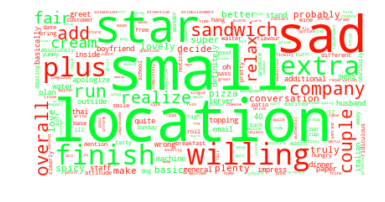

In [46]:
plt.imshow(wc1.recolor(color_func=color_func23, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.savefig('WordCloud.png',dpi=1000,pad_inches=0)
plt.show()

plt.close()

# Sentiment Analysis using Bag of Words

In [1]:
import pandas as pd
df = pd.read_csv("new_data.csv")

In [2]:
#Creating document term matrix

from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.9,
                                min_df=20,
                                stop_words='english')
tf_master = tf_vectorizer.fit_transform(df['text'])
print("Vocabulary Size:",tf_master.shape[1])

Vocabulary Size: 2967


In [3]:
#Creating 1/0 label for "sentiment"

def f(row):
    if row['stars'] == 5 or row['stars'] == 4:
        val = 1
    else:
        val = 0
    return val

df['labels'] = df.apply(f,axis=1)
labels = df['labels']

In [4]:
#Training test split

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
tf_master, labels, test_size = 0.25, random_state = 95828)

C:\Users\shoun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Building an unpruned decision tree
clf1 = DecisionTreeClassifier(criterion="entropy",random_state=95825)
clf1.fit(X_train,y_train)
ypred_train = clf1.predict(X_train)
ypred_test = clf1.predict(X_test)
print("Training Accuracy: ",str(accuracy_score(y_train,ypred_train)))
print("Test Accuracy: ",str(accuracy_score(y_test,ypred_test)))

Training Accuracy:  1.0
Test Accuracy:  0.7612


In [6]:
import numpy as np
from sklearn.model_selection import cross_validate
num_folds = 5
fold_scores=[]
param_values = np.arange(5,90,5)
arg_max = None
max_cross_val_score = -np.inf
for C in param_values:
    nums=[]
    #print("C = " + str(C))
    clf = DecisionTreeClassifier(criterion="entropy",max_depth=C,random_state=95825)
    cv_results = cross_validate(clf, X_train, y_train,cv=num_folds ,return_train_score=False)
    nums.append(list(cv_results['test_score']))
    fold_scores.append(np.mean(nums))
    
    cross_val_score = np.mean(nums)
    if cross_val_score > max_cross_val_score:
            max_cross_val_score = cross_val_score
            arg_max = C


best_C = arg_max
print("Best C:",best_C)
print("Cross Validation Score:",max_cross_val_score)


Best C: 40
Cross Validation Score: 0.772928808531


In [7]:
#Using best hyperparameter to predict test accuracy

clf2 = DecisionTreeClassifier(criterion="entropy",max_depth=best_C,random_state=95825)
clf2.fit(X_train,y_train)
ypred_train = clf2.predict(X_train)
ypred_test = clf2.predict(X_test)
print("Training Accuracy: ",str(accuracy_score(y_train,ypred_train)))
print("Test Accuracy: ",str(accuracy_score(y_test,ypred_test)))

Training Accuracy:  0.9676
Test Accuracy:  0.7664


In [8]:
#Random Forest

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

clf3 = DecisionTreeClassifier(criterion="entropy")
num_trees = 100
m = int (0.2 *tf_master.shape[1])
model = BaggingClassifier(base_estimator=clf3, n_estimators=num_trees, max_features = m, random_state =95828 )
model = model.fit(X_train, y_train)

param_grid = [{'base_estimator__max_depth':np.arange(5,90,5)}]
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print("best depth is : ",grid.best_params_)

0.869733333333
best depth is :  {'base_estimator__max_depth': 80}


In [9]:
#RF on test data with best depth

clf4 = DecisionTreeClassifier(criterion="entropy",max_depth=grid.best_params_)
num_trees = 100
m = int (0.2 *tf_master.shape[1])

model_new = BaggingClassifier(base_estimator=clf4, n_estimators=num_trees, max_features = m, random_state =95828 )
model_new = model.fit(X_train, y_train)
ypred_train = model_new.predict(X_train)
ypred_test = model_new.predict(X_test)
print("Training Accuracy: ",str(accuracy_score(y_train,ypred_train)))
print("Test Accuracy: ",str(accuracy_score(y_test,ypred_test)))


Training Accuracy:  0.9996
Test Accuracy:  0.8512


In [10]:
#Unregularized Logistic Regression

from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(penalty='l1',C=1e10)
LogReg.fit(X_train, y_train)
ypred_train = LogReg.predict(X_train)
ypred_test = LogReg.predict(X_test)
print("Training Accuracy: ",str(accuracy_score(y_train,ypred_train)))
print("Test Accuracy: ",str(accuracy_score(y_test,ypred_test)))


Training Accuracy:  1.0
Test Accuracy:  0.8436


In [11]:
#Regularized Logisitc Regression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
fold_scores=[]
num_folds = 5
k_fold = KFold(num_folds)
param_values = np.linspace(0.04,1,num=20)
arg_max = None
max_cross_val_score = -np.inf
for C in param_values:
    nums=[]
    
    print("C = " + str(C))
    clf = LogisticRegression(penalty='l1',C=C)        
    cv_results = cross_validate(clf, X_train, y_train,cv=num_folds ,return_train_score=False)
    nums.append(list(cv_results['test_score']))
    fold_scores.append(np.mean(nums))
    
    cross_val_score = np.mean(nums)
    if cross_val_score > max_cross_val_score:
            max_cross_val_score = cross_val_score
            arg_max = C


best_C = arg_max
print("Best C:",best_C)
print("Cross Validation Score:",max_cross_val_score)


C = 0.04
C = 0.0905263157895
C = 0.141052631579
C = 0.191578947368
C = 0.242105263158
C = 0.292631578947
C = 0.343157894737
C = 0.393684210526
C = 0.444210526316
C = 0.494736842105
C = 0.545263157895
C = 0.595789473684
C = 0.646315789474
C = 0.696842105263
C = 0.747368421053
C = 0.797894736842
C = 0.848421052632
C = 0.898947368421
C = 0.949473684211
C = 1.0
Best C: 0.545263157895
Cross Validation Score: 0.890668226964


In [12]:
LogReg_regularized = LogisticRegression(penalty='l1',C=best_C,)
LogReg_regularized.fit(X_train, y_train)
ypred_train = LogReg_regularized.predict(X_train)
ypred_test = LogReg_regularized.predict(X_test)
print("Training Accuracy: ",str(accuracy_score(y_train,ypred_train)))
print("Test Accuracy: ",str(accuracy_score(y_test,ypred_test)))


Training Accuracy:  0.957733333333
Test Accuracy:  0.8816


In [13]:
#SVM

from sklearn import svm

fold_scores=[]
num_folds = 5
k_fold = KFold(num_folds)
param_values = np.logspace(-4, 2, 10)
arg_max = None
max_cross_val_score = -np.inf
for C in param_values:
    nums=[]
    
    print("C = " + str(C))
    clf = svm.LinearSVC(C=C)
    cv_results = cross_validate(clf, X_train, y_train,cv=num_folds ,return_train_score=False)
    nums.append(list(cv_results['test_score']))
    fold_scores.append(np.mean(nums))
    
    cross_val_score = np.mean(nums)
    if cross_val_score > max_cross_val_score:
            max_cross_val_score = cross_val_score
            arg_max = C


best_C = arg_max
print("Best C:",best_C)
print("Cross Validation Score:",max_cross_val_score)


C = 0.0001
C = 0.000464158883361
C = 0.00215443469003
C = 0.01
C = 0.0464158883361
C = 0.215443469003
C = 1.0
C = 4.64158883361
C = 21.5443469003
C = 100.0
Best C: 0.01
Cross Validation Score: 0.897201829156


In [14]:
clf_SVM = svm.LinearSVC(C=C)
clf_SVM.fit(X_train, y_train)
ypred_train = clf_SVM.predict(X_train)
ypred_test = clf_SVM.predict(X_test)
print("Training Accuracy: ",str(accuracy_score(y_train,ypred_train)))
print("Test Accuracy: ",str(accuracy_score(y_test,ypred_test)))


Training Accuracy:  0.999333333333
Test Accuracy:  0.844


In [15]:
# KNN 

from sklearn.neighbors import KNeighborsClassifier

fold_scores=[]
num_folds = 5
k_fold = KFold(num_folds)
param_values = [1,3,5,7,9,11]
arg_max = None
max_cross_val_score = -np.inf
for C in param_values:
    nums=[]
    
    print("C = " + str(C))
    knn_model = KNeighborsClassifier(n_neighbors=C)
    cv_results = cross_validate(knn_model, X_train, y_train,cv=num_folds ,return_train_score=False)
    nums.append(list(cv_results['test_score']))
    fold_scores.append(np.mean(nums))
    
    cross_val_score = np.mean(nums)
    print(cross_val_score)
    if cross_val_score > max_cross_val_score:
            max_cross_val_score = cross_val_score
            arg_max = C


best_C = arg_max
print("Best C:",best_C)
print("Cross Validation Score:",max_cross_val_score)


C = 1
0.624129997391
C = 3
0.629466532741
C = 5
0.633327245331
C = 7
0.62772973268
C = 9
0.620528574102
C = 11
0.613860927227
Best C: 5
Cross Validation Score: 0.633327245331


In [16]:
clf_KNN = KNeighborsClassifier(n_neighbors=3)
clf_KNN.fit(X_train, y_train)
ypred_train = clf_KNN.predict(X_train)
ypred_test = clf_KNN.predict(X_test)
print("Training Accuracy: ",str(accuracy_score(y_train,ypred_train)))
print("Test Accuracy: ",str(accuracy_score(y_test,ypred_test)))


Training Accuracy:  0.7628
Test Accuracy:  0.6188


In [130]:
sum([all(tup) for tup in zip(data['prediction']==1, data['sentiment']==0)])

1142

# Sentiment Analysis using pre-trained embeddings

We use GloVe pretrained embeddings on Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors) to use for sentiment analysis. We obtained the embeddings from https://nlp.stanford.edu/projects/glove/.

## Data Cleaning
We first import the data, and clean it by removing stopwords and tokenizing.

In [3]:
%matplotlib inline
import spacy
import pandas as pd
import numpy as np
import re
import string

reviews = pd.read_csv('./new_data.csv')

idx1 = [True if i == 1 else False for i in reviews['stars']]
idx5 = [True if i == 5 else False for i in reviews['stars']]
y = reviews['stars'].tolist()
y = [-1 if star in [1,2] else 1 for star in y]
reviews = pd.Series(reviews['text'])
reviews = reviews.tolist()

In [5]:
# load spacy en
nlp = spacy.load('en')

# load stopwords
# inspired by https://stackoverflow.com/a/3510894
stopwords = pd.read_csv("./stopwords.txt", header = None, encoding = "UTF-8", squeeze=True)
stopwords = np.asarray(stopwords)
pattern = "|".join(stopwords)
stopwords = re.compile("\\b(" + pattern + ")\\W", re.I)
punctuation = re.compile(r'[^\w_ ]+', re.I)

# clean the text (drops punctuation, only alpha-numeric, no stopwords)
x = []
i = 0
for review in reviews:
    review = punctuation.sub("", review)
    review = stopwords.sub("", review)
    parsed_text = nlp(review)
    intermediate_text = []
    for token in parsed_text:
        intermediate_text.append(token.lemma_.lower())
    words = " ".join(intermediate_text)
    if words != '':
        x.append(words)
    i+=1
    
i=0
for review in x[:5]:
    print(i)
    print(review)
    i+=1
    
# clear memory
reviews = None

0
useless staff order correct reasonable time frame management need rehire staff
1
go boyfriend week order sizzle plate special fish   assorted seafood boil season salty compare near yonge college fish really salty teriyaki sauce will not go location hot like really try hard kitchen salty season shrimp devein bring boyfriend server eye boyfriend nerve gently touch handing debit machine lol hope help
2
go fountain attach recess order burger look pretty good absolutely cover sauce personally awful list menu burger like completely swim stuff take bite burger like taste sauce basically mayonnaise sandwich server return later ask alright explain sauce bad quietly apologized take plate away return minute later billin service mediocre inattentive unpleasant hurry despite table restaurant end pay leave unsatisfiedwill back
3
agree employee tim horton location bit rude today 10 pm   jan 16 2016 go tim horton order hot chocolate white female extremely rude racist give attitude handle drink rough

## Creating features
We then turn the Yelp reviews into vectors with the help of word embeddings. These embeddings are pre-trained tensors of the GloVe model on Twitter. So, we load these embeddings and create an average of the word tensors by review. This is, given a review, we take the average of the individual token embeddings and asign it to the review. Hence, each Yelp review now is has a feature vector built on the embeddings.

Representation learning for very short texts using weighted word embedding aggregation. Cedric De Boom, Steven Van Canneyt, Thomas Demeester, Bart Dhoedt. Pattern Recognition Letters; arxiv:1607.00570. abstract, pdf. See especially Tables 1 and 2. https://arxiv.org/pdf/1607.00570

###  50 dimensional embeddings

In [6]:
# load GloVe
# Pre-process the embeddings
embeddings_index = {}

# We will use the 50-dimensional embedding vectors
with open("./glove.twitter.27B.50d.txt", encoding='UTF-8') as f:
    # Each row represents a word vector
    for line in f:
        values = line.split()
        # The first part is word
        word = values[0]
        # The rest are the embedding vector
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [30]:
# create embedding feature matrix by attaching average embedding to each review
fmatrix = np.zeros((len(x), 150))
ave_matrix = np.zeros((len(x), 50))
j = 0
for review in x:
    words = review.split()
    unique_words = np.unique(words)
    embedding_matrix = np.zeros((len(words), 50))
    i = 0
    for word in words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            i+=1
    # average
    fmatrix[j] = np.append(embedding_matrix.max(0), [embedding_matrix.min(0), embedding_matrix.mean(0)])
    ave_matrix[j] = embedding_matrix.mean(0)
    j += 1

# clear memory
# x = None

###  100 dimensional embeddings

In [38]:
# load GloVe
# Pre-process the embeddings
embeddings_index = {}

# We will use the 50-dimensional embedding vectors
with open("./glove.twitter.27B.100d.txt", encoding='UTF-8') as f:
    # Each row represents a word vector
    for line in f:
        values = line.split()
        # The first part is word
        word = values[0]
        # The rest are the embedding vector
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [39]:
# create embedding feature matrix by attaching average embedding to each review
fmatrix100 = np.zeros((len(x), 300))
ave_matrix100 = np.zeros((len(x), 100))
j = 0
for review in x:
    words = review.split()
    unique_words = np.unique(words)
    embedding_matrix = np.zeros((len(words), 100))
    i = 0
    for word in words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            i+=1
    # average
    fmatrix100[j] = np.append(embedding_matrix.max(0), [embedding_matrix.min(0), embedding_matrix.mean(0)])
    ave_matrix100[j] = embedding_matrix.mean(0)
    j += 1

# clear memory
# x = None

## Model Selection
We now train several models using the review embeddings as feature matrix. We run a grid search over the models to select the best model, and the best parametrization for every model.

###  50 dimensional embeddings

#### Mean

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# split data into testing and training
xtrain, xtest, ytrain, ytest = train_test_split(ave_matrix, y, test_size=0.25, random_state=11)

models = [
         "Naive Bayes",
         "SVM",
         "Logistic Regression",
         "Random Forest",
         "Adaboost Forest"
        ]

classifiers = [
    GaussianNB(),
    SVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    AdaBoostClassifier()
]

parameters = [
              {},                                                         # Gaussian Naive Bayes
              {'C': np.logspace(-4, 3, 5),                                # SVM
               'degree': range(1, 4),
               'kernel': ['poly']},
              {'C': np.logspace(-4, 3, 15)},                              # Logistic Regression
              {'n_estimators': np.linspace(100, 1000, 5).astype('int')},  # Random Forest
              {'n_estimators': np.linspace(100, 1500, 5).astype('int'),    # Adaboost Forest
               'learning_rate': np.linspace(0.001, 2, 3)},
             ]
optimal = {}
for model, clf, params in zip(models, classifiers, parameters):
    gscv = GridSearchCV(clf, param_grid=params, cv=10, n_jobs=-1)
    gscv = gscv.fit(xtrain, ytrain)
    score = gscv.best_score_
    optimal[model] = {'clf':gscv.best_estimator_, 'score':score}
    print("{} score: {}".format(model, score))

In [18]:
optimal["Adaboost Forest"]['clf']

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.50075, n_estimators=537, random_state=None)

#### Max, Min, Mean

In [40]:
%time
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# split data into testing and training
xtrain, xtest, ytrain, ytest = train_test_split(fmatrix, y, test_size=0.25, random_state=11)

models = [
         "Naive Bayes",
         "SVM",
         "Logistic Regression",
         "Random Forest",
         "Adaboost Forest"
        ]

classifiers = [
    GaussianNB(),
    SVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    AdaBoostClassifier()
]

parameters = [
              {},                                                         # Gaussian Naive Bayes
              {'C': np.logspace(-4, 3, 5),                                # SVM
               'degree': range(1, 4),
               'kernel': ['poly']},
              {'C': np.logspace(-4, 3, 15)},                              # Logistic Regression
              {'n_estimators': np.linspace(100, 1000, 5).astype('int')},  # Random Forest
              {'n_estimators': np.linspace(100, 1500, 5).astype('int'),    # Adaboost Forest
               'learning_rate': np.linspace(0.001, 2, 3)},
             ]
optimal = {}
for model, clf, params in zip(models, classifiers, parameters):
    gscv = GridSearchCV(clf, param_grid=params, cv=10, n_jobs=-1)
    gscv = gscv.fit(xtrain, ytrain)
    score = gscv.best_score_
    optimal[model] = {'clf':gscv.best_estimator_, 'score':score}
    print("{} score: {}".format(model, score))

Wall time: 0 ns
Naive Bayes score: 0.6897333333333333
SVM score: 0.8569333333333333
Logistic Regression score: 0.8556
Random Forest score: 0.8326666666666667
Adaboost Forest score: 0.8498666666666667


In [18]:
optimal["Adaboost Forest"]['clf']

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.50075, n_estimators=537, random_state=None)

###  100 dimensional embeddings

#### Mean

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# split data into testing and training
xtrain, xtest, ytrain, ytest = train_test_split(ave_matrix100, y, test_size=0.25, random_state=11)

models = [
         "Naive Bayes",
         "SVM",
         "Logistic Regression",
         "Random Forest",
         "Adaboost Forest"
        ]

classifiers = [
    GaussianNB(),
    SVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    AdaBoostClassifier()
]

parameters = [
              {},                                                         # Gaussian Naive Bayes
              {'C': np.logspace(-4, 3, 5),                                # SVM
               'degree': range(1, 4),
               'kernel': ['poly']},
              {'C': np.logspace(-4, 3, 15)},                              # Logistic Regression
              {'n_estimators': np.linspace(100, 1000, 5).astype('int')},  # Random Forest
              {'n_estimators': np.linspace(100, 1500, 5).astype('int'),    # Adaboost Forest
               'learning_rate': np.linspace(0.001, 2, 3)},
             ]
optimal = {}
for model, clf, params in zip(models, classifiers, parameters):
    gscv = GridSearchCV(clf, param_grid=params, cv=10, n_jobs=-1)
    gscv = gscv.fit(xtrain, ytrain)
    score = gscv.best_score_
    optimal[model] = {'clf':gscv.best_estimator_, 'score':score}
    print("{} score: {}".format(model, score))

In [18]:
optimal["Adaboost Forest"]['clf']

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.50075, n_estimators=537, random_state=None)

#### Max, Min, Mean

In [40]:
%time
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# split data into testing and training
xtrain, xtest, ytrain, ytest = train_test_split(fmatrix100, y, test_size=0.25, random_state=11)

models = [
         "Naive Bayes",
         "SVM",
         "Logistic Regression",
         "Random Forest",
         "Adaboost Forest"
        ]

classifiers = [
    GaussianNB(),
    SVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    AdaBoostClassifier()
]

parameters = [
              {},                                                         # Gaussian Naive Bayes
              {'C': np.logspace(-4, 3, 5),                                # SVM
               'degree': range(1, 4),
               'kernel': ['poly']},
              {'C': np.logspace(-4, 3, 15)},                              # Logistic Regression
              {'n_estimators': np.linspace(100, 1000, 5).astype('int')},  # Random Forest
              {'n_estimators': np.linspace(100, 1500, 5).astype('int'),    # Adaboost Forest
               'learning_rate': np.linspace(0.001, 2, 3)},
             ]
optimal = {}
for model, clf, params in zip(models, classifiers, parameters):
    gscv = GridSearchCV(clf, param_grid=params, cv=10, n_jobs=-1)
    gscv = gscv.fit(xtrain, ytrain)
    score = gscv.best_score_
    optimal[model] = {'clf':gscv.best_estimator_, 'score':score}
    print("{} score: {}".format(model, score))

Wall time: 0 ns
Naive Bayes score: 0.6897333333333333
SVM score: 0.8569333333333333
Logistic Regression score: 0.8556
Random Forest score: 0.8326666666666667
Adaboost Forest score: 0.8498666666666667


In [18]:
optimal["Adaboost Forest"]['clf']

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.50075, n_estimators=537, random_state=None)

## Calculate test error
We now test the best model, as obtained by the last procedure. This model is the best among the selected model families and also has the best hyper-parameter selection.

In [ ]:
# get the best model
bestModel = max(map(lambda x: (optimal[x]['score'], x), optimal.keys()))[1]
bestClf = optimal[bestModel]['clf']

# calculate the predictions
predtest = bestClf.predict(xtest)
predtrain = bestClf.predict(xtrain)

# report training and test accuracy
print('Training accuracy is: ' + str(accuracy_score(ytrain, predtrain)))
print('Test accuracy is: ' + str(accuracy_score(ytest, predtest)))